In [1]:
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import pandas as pd
import os
import time
import csv
import json
from typing import Dict, List, Optional, Union, cast
import requests
import prepare

from bs4 import BeautifulSoup

df = prepare.wrangle_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 391
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             256 non-null    object
 1   language         256 non-null    object
 2   readme_contents  256 non-null    object
 3   stemmed          256 non-null    object
 4   lemmatized       256 non-null    object
dtypes: object(5)
memory usage: 12.0+ KB


In [2]:
df.head()

,repo,language,readme_contents,stemmed,lemmatized
0,dreamingechoes/awesome-mental-health,HTML,"\n<p align=""center""><img src=""./media/logo.png...",aboutsparkl curat list awesom articl websit re...,aboutsparkles curated list awesome article web...
1,Flaque/quirk,TypeScript,🚧🚧🚧\n\n**Quirk is no longer being maintained.*...,quirk longer maintainedquirk start littl thing...,quirk longer maintainedquirk started little th...
4,sepandhaghighi/nafas,Python,"<div align=""center"">\n<img src=""https://github...",nafa &#9; tabl content overview instal usag is...,nafas &#9; table content overview installation...
5,youarerad/youareradweb,TypeScript,"<div align=""center""><img src=""https://res.clou...",welcom rise disord ' websit repow nonprofit co...,welcome rise disorder ' website repowe nonprof...
7,OSMIHelp/osmi-survey-graph,PHP,# 2016 OSMI Survey Graph\n\n## Installing and ...,2016 osmi survey graph instal run copi envexam...,2016 osmi survey graph installing running copy...


In [3]:
df.language.value_counts()

JavaScript    63
HTML          45
Python        41
TypeScript    22
Java          22
Dart          14
CSS           12
R             12
Swift          9
Vue            6
PHP            5
C++            5
Name: language, dtype: int64

In [4]:
df = df[df.language != 'Jupyter Notebook']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 391
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             256 non-null    object
 1   language         256 non-null    object
 2   readme_contents  256 non-null    object
 3   stemmed          256 non-null    object
 4   lemmatized       256 non-null    object
dtypes: object(5)
memory usage: 12.0+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 391
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             256 non-null    object
 1   language         256 non-null    object
 2   readme_contents  256 non-null    object
 3   stemmed          256 non-null    object
 4   lemmatized       256 non-null    object
dtypes: object(5)
memory usage: 12.0+ KB


In [7]:
df = df.dropna()
df = df[df['language'].map(df['language'].value_counts()) >= 5]

In [8]:
df.language.value_counts()

JavaScript    63
HTML          45
Python        41
TypeScript    22
Java          22
Dart          14
CSS           12
R             12
Swift          9
Vue            6
PHP            5
C++            5
Name: language, dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 391
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             256 non-null    object
 1   language         256 non-null    object
 2   readme_contents  256 non-null    object
 3   stemmed          256 non-null    object
 4   lemmatized       256 non-null    object
dtypes: object(5)
memory usage: 12.0+ KB


In [11]:
df['readme_original'] = df['readme_contents']

In [12]:
def basic_clean(string):
    string = string.lower()
    string = (unicodedata.normalize('NFKD', string)
                         .encode('ascii', 'ignore')
                         .decode('utf-8', 'ignore')
             )
    string = re.sub(r"[^a-z0-9'\s]", '', string)
    return string

In [13]:
df['readme_contents'] = df['readme_contents'].apply(basic_clean)

In [14]:
df.head()

,repo,language,readme_contents,stemmed,lemmatized,readme_original
0,dreamingechoes/awesome-mental-health,HTML,\np aligncenterimg srcmedialogopngp\n\np align...,aboutsparkl curat list awesom articl websit re...,aboutsparkles curated list awesome article web...,"\n<p align=""center""><img src=""./media/logo.png..."
1,Flaque/quirk,TypeScript,\n\nquirk is no longer being maintained\n\nqui...,quirk longer maintainedquirk start littl thing...,quirk longer maintainedquirk started little th...,🚧🚧🚧\n\n**Quirk is no longer being maintained.*...
4,sepandhaghighi/nafas,Python,div aligncenter\nimg srchttpsgithubcomsepandha...,nafa &#9; tabl content overview instal usag is...,nafas &#9; table content overview installation...,"<div align=""center"">\n<img src=""https://github..."
5,youarerad/youareradweb,TypeScript,div aligncenterimg srchttpsrescloudinarycomdf2...,welcom rise disord ' websit repow nonprofit co...,welcome rise disorder ' website repowe nonprof...,"<div align=""center""><img src=""https://res.clou..."
7,OSMIHelp/osmi-survey-graph,PHP,2016 osmi survey graph\n\n installing and run...,2016 osmi survey graph instal run copi envexam...,2016 osmi survey graph installing running copy...,# 2016 OSMI Survey Graph\n\n## Installing and ...


In [15]:
def clean_html(string):
    string = re.sub(r'<[^>]*>', '', string)
    string = re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", '', string)
    string = re.sub(r'\n', '', string)
    string = re.sub(r'\s\s', '', string)
    return string

In [16]:
df['readme_contents'] = df['readme_contents'].apply(clean_html)

In [17]:
df.head()

,repo,language,readme_contents,stemmed,lemmatized,readme_original
0,dreamingechoes/awesome-mental-health,HTML,p aligncenterimg srcmedialogopngpp aligncenter...,aboutsparkl curat list awesom articl websit re...,aboutsparkles curated list awesome article web...,"\n<p align=""center""><img src=""./media/logo.png..."
1,Flaque/quirk,TypeScript,quirk is no longer being maintainedquirk start...,quirk longer maintainedquirk start littl thing...,quirk longer maintainedquirk started little th...,🚧🚧🚧\n\n**Quirk is no longer being maintained.*...
4,sepandhaghighi/nafas,Python,div aligncenterimg srchttpsgithubcomsepandhagh...,nafa &#9; tabl content overview instal usag is...,nafas &#9; table content overview installation...,"<div align=""center"">\n<img src=""https://github..."
5,youarerad/youareradweb,TypeScript,div aligncenterimg srchttpsrescloudinarycomdf2...,welcom rise disord ' websit repow nonprofit co...,welcome rise disorder ' website repowe nonprof...,"<div align=""center""><img src=""https://res.clou..."
7,OSMIHelp/osmi-survey-graph,PHP,2016 osmi survey graph installing and running...,2016 osmi survey graph instal run copi envexam...,2016 osmi survey graph installing running copy...,# 2016 OSMI Survey Graph\n\n## Installing and ...


In [18]:
def tokenize(string):
    tokenizer = nltk.tokenize.ToktokTokenizer()
    return tokenizer.tokenize(string, return_str=True)

In [19]:
df['readme_contents'] = df['readme_contents'].apply(tokenize)

In [20]:
def stem(string):
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in string.split()]
    return ' '.join(stems)

In [21]:
df['readme_contents'] = df['readme_contents'].apply(stem)

In [22]:
df['readme_contents']

0      p aligncenterimg srcmedialogopngpp aligncenter...
1      quirk is no longer be maintainedquirk start as...
4      div aligncenterimg srchttpsgithubcomsepandhagh...
5      div aligncenterimg srchttpsrescloudinarycomdf2...
7      2016 osmi survey graph instal and run copi env...
                             ...                        
381    self care projectwhat use to be a mental healt...
385    mental health assess by nlp and ml use tensorf...
386    aboutread githubbitbucket descript copyright n...
388    head h1 aligncentersoulstoneh1 descript h3 ali...
391    prevalencia de transtorno mentai entr generosp...
Name: readme_contents, Length: 256, dtype: object

In [23]:
def lemmatize(string):
    wnl = nltk.stem.WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    return ' '.join(lemmas)

In [24]:
df['readme_contents'] = df['readme_contents'].apply(lemmatize)

In [25]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    stopword_list = stopwords.words('english')
    
    for word in extra_words:
        stopword_list.append(word)
    
    for word in exclude_words:
        stopword_list.remove(word)
        
    words = string.split()
    filtered_words = [word for word in words if word not in stopword_list]
    return ' '.join(filtered_words)

In [26]:
df['readme_contents'] = df['readme_contents'].apply(remove_stopwords)

In [27]:
df['lemmatized']

0      aboutsparkles curated list awesome article web...
1      quirk longer maintainedquirk started little th...
4      nafas &#9; table content overview installation...
5      welcome rise disorder ' website repowe nonprof...
7      2016 osmi survey graph installing running copy...
                             ...                        
381    self care projectwhat used mental health proje...
385    mental health assessment nlp ml using tensorfl...
386    read githubbitbucket description copyright not...
388    soulstonepersonal reflection thought one ' sel...
391    prevalencia de transtornos mentais entre gener...
Name: lemmatized, Length: 256, dtype: object

In [28]:


def prepare_readme_data(df, column):
    clean_tokens = (df[column].apply(clean_html)
                              .apply(basic_clean)
                              .apply(tokenize)
                              .apply(remove_stopwords)
                   )
    
    for token in clean_tokens:
        token = ' '.join(token).split()
    
    df['stemmed'] = clean_tokens.apply(stem)
    df['lemmatized'] = clean_tokens.apply(lemmatize)
    return df

def wrangle_data():
    data = pd.read_json('data.json')
    return prepare_readme_data(data, 'readme_contents')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 391
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             256 non-null    object
 1   language         256 non-null    object
 2   readme_contents  256 non-null    object
 3   stemmed          256 non-null    object
 4   lemmatized       256 non-null    object
 5   readme_original  256 non-null    object
dtypes: object(6)
memory usage: 14.0+ KB


### Let's first take a look at how many of the languages are there in the readmes


In [30]:
languages = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
languages.columns = ['n', 'percent']
languages

,n,percent
JavaScript,63,0.246094
HTML,45,0.175781
Python,41,0.160156
TypeScript,22,0.085938
Java,22,0.085938
Dart,14,0.054688
CSS,12,0.046875
R,12,0.046875
Swift,9,0.035156
Vue,6,0.023438


In [31]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') 
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [32]:
js_words = clean(' '.join(df[df.language == 'JavaScript'].lemmatized))
HTML_words = clean(' '.join(df[df.language == 'HTML'].lemmatized))
Python_words = clean(' '.join(df[df.language == 'Python'].lemmatized))
TypeScript_words = clean(' '.join(df[df.language == 'TypeScript'].lemmatized))
Java_words = clean(' '.join(df[df.language == 'Java'].lemmatized))
Dart_words = clean(' '.join(df[df.language == 'Dart'].lemmatized))
R_words = clean(' '.join(df[df.language == 'R'].lemmatized))
CSS_words = clean(' '.join(df[df.language == 'CSS'].lemmatized))
Swift_words = clean(' '.join(df[df.language == 'Swift'].lemmatized))
Vue_words = clean(' '.join(df[df.language == 'Vue'].lemmatized))
PHP_words = clean(' '.join(df[df.language == 'PHP'].lemmatized))
Cplus_words = clean(' '.join(df[df.language == 'C++'].lemmatized))


all_words = clean(' '.join(df.lemmatized))

In [33]:
freq_js_words = pd.Series(js_words).value_counts()
freq_HTML_words =      pd.Series(HTML_words).value_counts()
freq_Python_words =pd.Series(Python_words).value_counts()
freq_TypeScript_words= pd.Series(TypeScript_words).value_counts()
freq_Java_words =  pd.Series(Java_words).value_counts()
freq_Dart_words =  pd.Series(Dart_words).value_counts()
freq_R_words = pd.Series(R_words).value_counts()
freq_CSS_words =pd.Series(CSS_words).value_counts()
freq_Swift_words = pd.Series(Swift_words).value_counts()
freq_Vue_words =pd.Series(Vue_words).value_counts()
freq_PHP_words =pd.Series(PHP_words).value_counts()
freq_Cplus_words = pd.Series(Cplus_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

freq_js_words.head()



mental    101
user       92
health     82
app        81
run        66
dtype: int64

### creating a dataframe with all the frequencies of all the languages

In [34]:

word_counts = (pd.concat([all_freq, freq_js_words,freq_HTML_words, 
freq_Python_words, freq_TypeScript_words,freq_Java_words,freq_Dart_words,freq_R_words,freq_CSS_words,freq_Swift_words, freq_Vue_words,
freq_PHP_words,freq_Cplus_words], axis=1, sort=True)
                .set_axis(['all', 'freq_js_words', 'freq_HTML_words', 'freq_Python_words', 'freq_TypeScript_words','freq_Java_words','freq_Dart_words','freq_R_words','freq_CSS_words','freq_Swift_words', 'freq_Vue_words',
'freq_PHP_words','freq_Cplus_words'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,freq_js_words,freq_HTML_words,freq_Python_words,freq_TypeScript_words,freq_Java_words,freq_Dart_words,freq_R_words,freq_CSS_words,freq_Swift_words,freq_Vue_words,freq_PHP_words,freq_Cplus_words
0,20,14,4,0,2,0,0,0,0,0,0,0,0
000,1,0,0,0,0,0,1,0,0,0,0,0,0
0000osenvironsetdefaultport,1,0,1,0,0,0,0,0,0,0,0,0,0
0001,2,0,1,1,0,0,0,0,0,0,0,0,0
00025mcnemar,1,0,1,0,0,0,0,0,0,0,0,0,0


In [35]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,freq_js_words,freq_HTML_words,freq_Python_words,freq_TypeScript_words,freq_Java_words,freq_Dart_words,freq_R_words,freq_CSS_words,freq_Swift_words,freq_Vue_words,freq_PHP_words,freq_Cplus_words
mental,548,101,224,73,25,27,33,19,16,18,2,6,4
health,490,82,198,80,25,26,21,22,13,12,6,5,0
user,448,92,183,31,22,66,25,0,2,18,2,4,3
project,301,62,87,29,26,28,30,8,20,3,3,4,1
app,283,81,23,6,53,32,48,1,5,28,4,1,1
page,281,50,185,2,17,10,3,0,6,2,3,1,2
help,254,38,95,27,32,8,28,2,8,9,2,0,5
data,238,37,45,71,16,21,13,17,0,5,2,5,6
use,204,57,58,28,16,11,7,1,8,3,0,4,11
using,201,47,38,49,6,24,8,7,6,6,1,4,5


Text(0.5, 1.0, 'Proportion of languages for the 20 most common words')

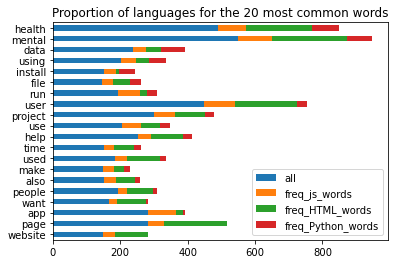

In [36]:
(word_counts
 .assign(js_words=word_counts.freq_js_words / word_counts['all'],
         HTML_words=word_counts.freq_HTML_words / word_counts['all'],
        Python_words=word_counts.freq_Python_words / word_counts['all'])
 .sort_values(by='all')
 [['all', 'freq_js_words', 'freq_HTML_words', 'freq_Python_words']]
 .tail(20)
 .sort_values('freq_Python_words')
 .plot.barh(stacked=True))

plt.title('Proportion of languages for the 20 most common words')


In [37]:
# (word_counts
#  [(word_counts.freq_js_words > 10) & (word_counts.freq_HTML_words > 10) & word_counts.freq_Python_words]
#  .assign(ratio=lambda df: df.spam / (df.ham + .01))
#  .sort_values(by='ratio')
#  .pipe(lambda df: pd.concat([df.head(), df.tail()])))
     

In [45]:
plt.figure(figsize=(7,6))

all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))

#fig, axes = plt.subplots(2, 2, figsize=(12,9))

#ax1 = WordCloud(data= js_cloud, background_color='white', height=600, width=800).generate(' '.join(js_words) ax=axes[0,0])
#ax2 = WordCloud(data= html_cloud, background_color='white', height=600, width=800).generate(' '.join(js_words) ax=axes[0,1])


<Figure size 504x432 with 0 Axes>

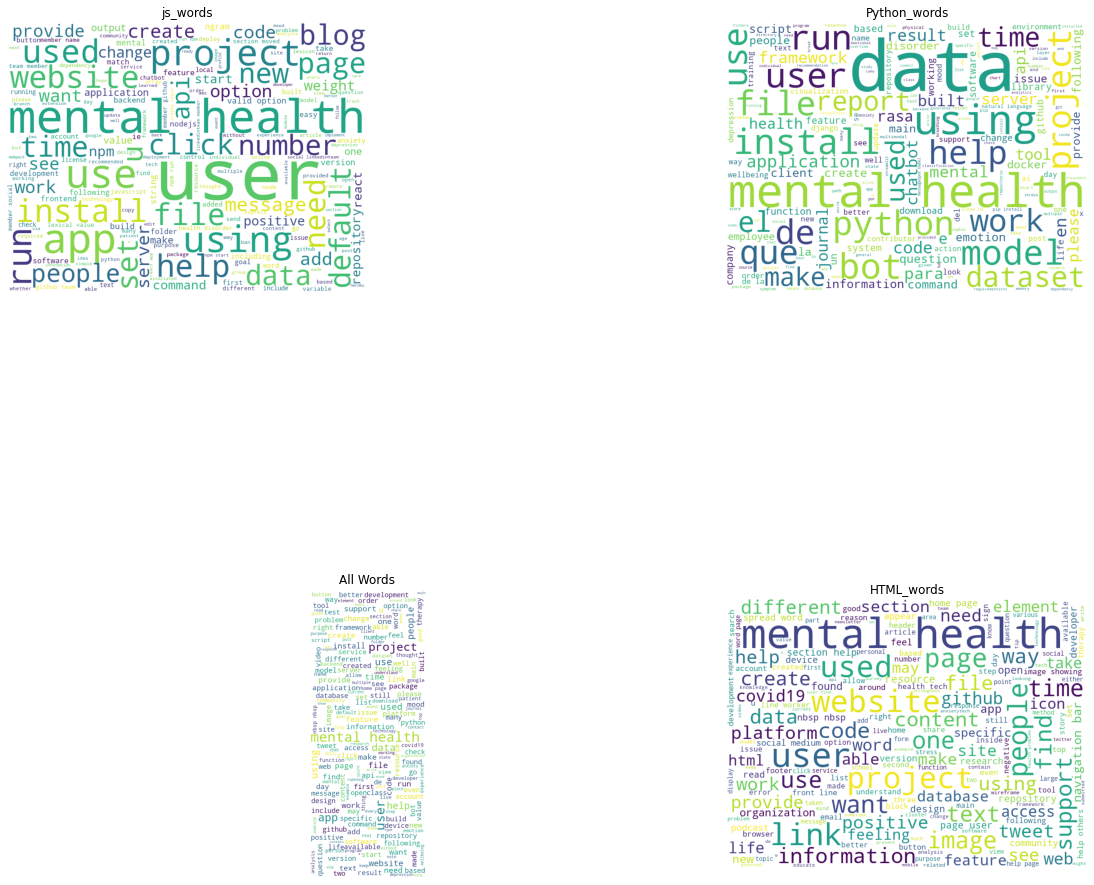

In [48]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
js_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(js_words))
html_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(HTML_words))
python_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(Python_words))
plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, 1, .5]), plt.axes([0, 1, .5, .5]), plt.axes([1, 0, .5, .5]), plt.axes([1, 1, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(js_cloud)
axs[2].imshow(html_cloud)
axs[3].imshow(python_cloud)


axs[0].set_title('All Words')
axs[1].set_title('js_words')
axs[2].set_title('HTML_words')
axs[3].set_title('Python_words')


for ax in axs: ax.axis('off')